In [1]:
# Standard modules
import pdb
import sys
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.wcs import WCS

import warnings
warnings.filterwarnings("ignore")

sys.path.append("..")

from fluctfitwrapper import FluctFitWrapper

from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [2]:
# Define Path to configuration file
path_ini_file = os.path.join("..","config","uvista.ini")
populations=['sf', 'qt','agn']
populations=['sf']

In [ ]:
# Use SimstackWrapper to read in config file and perform stack.
fluctfit_object = FluctFitWrapper(path_ini_file, 
                                  read_maps=True, 
                                  read_catalog=True, 
                                  keep_catalog=True,
                                  fit_automatically=True, 
                                  populations=populations,
                                  overwrite_results=True)

In [ ]:
fluctfit_object.results_dict['cov_direct_fit'].params

In [4]:
fluctfit_object.results_dict['cov_direct_fit'].params

name,value,standard error,relative error,initial value,min,max,vary
A_offset_sf,-41.9992491,3614.44482,(8605.97%),-42,-inf,inf,True
T_offset_sf,23.0087510,34438.9470,(149677.60%),23,-inf,inf,True
A_offset_qt,-47.1492024,27930127.8,(59237752.47%),-50,-inf,inf,True
T_offset_qt,161.892928,1.2918e+09,(797925368.15%),130,-inf,inf,True
A_offset_agn,-40.9998467,704.701906,(1718.79%),-41,-inf,inf,True
T_offset_agn,18.0016622,6752.59266,(37510.94%),18,-inf,inf,True
A_slope_redshift_sf,0.20156017,1439.52869,(714193.04%),0.2,-inf,inf,True
T_slope_redshift_sf,0.21797115,16781.5855,(7698993.69%),0.2,-inf,inf,True
A_slope_redshift_qt,0.24463909,2819057.78,(1152333313.00%),0.2,-inf,inf,True
T_slope_redshift_qt,0.14887153,4040542.00,(2714113272.73%),0.2,-inf,inf,True


In [30]:
def model_A_or_Tdust(params, X):
    v = params.valuesdict().copy()
    if 'A_offset' in v:
        model = v.pop('A_offset')
    elif 'T_offset' in v:
        model = v.pop('T_offset')
    if 'A_offset_sf' in v:
        model = v.pop('A_offset_sf')
    elif 'T_offset_sf' in v:
        model = v.pop('T_offset_sf')
    if 'A_offset_qt' in v:
        model = v.pop('A_offset_qt')
    elif 'T_offset_qt' in v:
        model = v.pop('T_offset_qt')
    if 'A_offset_agn' in v:
        model = v.pop('A_offset_agn')
    elif 'T_offset_agn' in v:
        model = v.pop('T_offset_agn')
    for i, ival in enumerate(v):
        model+= X[i] * v[ival]
    return model

In [9]:
fluctfit_object.datacube_dict['catalog_keys']

['z_peak', 'LMASS', 'F_ratio', 'sfg']

In [25]:
fluctfit_object.datacube_dict['catalog_dict'] 

{'redshift': 'z_peak',
 'stellar_mass': 'LMASS',
 'agn_fraction': 'F_ratio',
 'split_params': 'sfg'}

In [37]:
datacube_sf = fluctfit_object.datacube_dict['datacube'][fluctfit_object.datacube_dict['idx']['sf']]
datacube_qt = fluctfit_object.datacube_dict['datacube'][fluctfit_object.datacube_dict['idx']['qt']]
datacube_agn = fluctfit_object.datacube_dict['datacube'][fluctfit_object.datacube_dict['idx']['agn']]

In [34]:
cov_direct_fit_three=fluctfit_object.results_dict['cov_direct_fit']

vT_sf_three = cov_direct_fit_three.params.copy()
vA_sf_three = cov_direct_fit_three.params.copy()
vT_qt_three = cov_direct_fit_three.params.copy()
vA_qt_three = cov_direct_fit_three.params.copy()
vT_agn_three = cov_direct_fit_three.params.copy()
vA_agn_three = cov_direct_fit_three.params.copy()

Alist = [i for i, j in vA_sf_three.items() if (('A_' in i) or ('_qt' in i) or ('t_agn' in i) or ('s_agn' in i) or ('n_agn' in i))]
Tlist = [i for i, j in vT_sf_three.items() if (('T_' in i) or ('_qt' in i) or ('t_agn' in i) or ('s_agn' in i) or ('n_agn' in i))]
Apop=[vA_sf_three.pop(i) for i in Tlist]
Tpop=[vT_sf_three.pop(i) for i in Alist]

Alist = [i for i, j in vA_qt_three.items() if (('A_' in i) or ('_sf' in i) or ('t_agn' in i) or ('s_agn' in i) or ('n_agn' in i))]
Tlist = [i for i, j in vT_qt_three.items() if (('T_' in i) or ('_sf' in i) or ('t_agn' in i) or ('s_agn' in i) or ('n_agn' in i))]
Apop=[vA_qt_three.pop(i) for i in Tlist]
Tpop=[vT_qt_three.pop(i) for i in Alist]

Alist = [i for i, j in vA_agn_three.items() if (('A_' in i) or ('_sf' in i) or ('_qt' in i))]
Tlist = [i for i, j in vT_agn_three.items() if (('T_' in i) or ('_sf' in i) or ('_qt' in i))]
Apop=[vA_agn_three.pop(i) for i in Tlist]
Tpop=[vT_agn_three.pop(i) for i in Alist]

In [41]:
Zs_sf = datacube_sf[fluctfit_object.datacube_dict['catalog_dict']['redshift']]
Ms_sf = datacube_sf[fluctfit_object.datacube_dict['catalog_dict']['stellar_mass']]
Zs_qt = datacube_qt[fluctfit_object.datacube_dict['catalog_dict']['redshift']]
Ms_qt = datacube_qt[fluctfit_object.datacube_dict['catalog_dict']['stellar_mass']]
Zs_agn = datacube_agn[fluctfit_object.datacube_dict['catalog_dict']['redshift']]
Ms_agn = datacube_agn[fluctfit_object.datacube_dict['catalog_dict']['stellar_mass']]

In [56]:
vA_sf_three

name,value,standard error,relative error,initial value,min,max,vary
A_offset_sf,-41.9992491,3614.44482,(8605.97%),-42,-inf,inf,True
A_slope_redshift_sf,0.20156017,1439.52869,(714193.04%),0.2,-inf,inf,True
A_slope_stellar_mass_sf,0.20008204,359.317478,(179585.08%),0.2,-inf,inf,True
A_slope_agn_fraction_sf,0.19950988,649.541655,(325568.67%),0.2,-inf,inf,True


In [57]:
vT_sf_three

name,value,standard error,relative error,initial value,min,max,vary
T_offset_sf,23.0087510,34438.9470,(149677.60%),23,-inf,inf,True
T_slope_redshift_sf,0.21797115,16781.5855,(7698993.69%),0.2,-inf,inf,True
T_slope_stellar_mass_sf,0.20095611,3331.97838,(1658062.70%),0.2,-inf,inf,True
T_slope_agn_fraction_sf,0.19472165,7675.32878,(3941692.61%),0.2,-inf,inf,True


In [45]:
As_sf = model_A_or_Tdust(vA_sf_three,
                         fluctfit_object.datacube_dict['datacube'][fluctfit_object.datacube_dict['idx']['sf']].to_numpy().T)
Ts_sf = model_A_or_Tdust(vT_sf_three,
                         fluctfit_object.datacube_dict['datacube'][fluctfit_object.datacube_dict['idx']['sf']].to_numpy().T)
As_qt = model_A_or_Tdust(vA_qt_three,
                         fluctfit_object.datacube_dict['datacube'][fluctfit_object.datacube_dict['idx']['qt']].to_numpy().T)
Ts_qt = model_A_or_Tdust(vT_qt_three,
                         fluctfit_object.datacube_dict['datacube'][fluctfit_object.datacube_dict['idx']['qt']].to_numpy().T)

In [47]:
print(np.shape(Zs_sf))
print(np.shape(Ms_qt))
print(np.shape(As_qt))
print(np.shape(Ts_qt))

(61944,)
(25307,)
(25307,)
(25307,)


In [52]:
Ts_sf

array([23.54190705, 23.93035313, 23.92390871, ..., 25.68044028,
       25.48367056, 25.95464198])

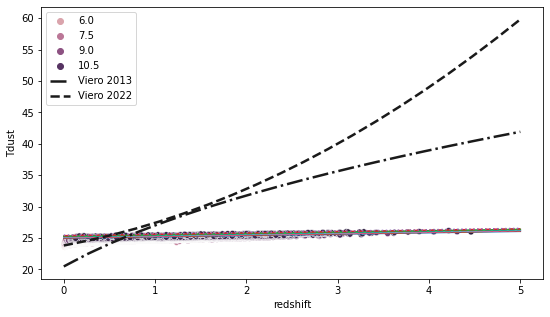

In [55]:
import seaborn as sns
fig, ax = plt.subplots(1,1, figsize=(9,5))
sns.set_color_codes(palette='pastel')
fig=sns.scatterplot(Zs_sf,Ts_sf, hue=Ms_sf)
#fig.set(ylim=(-38,-32))
fig.set(ylabel='Tdust')
fig.set(xlabel='redshift')
zs_model=np.linspace(0,5,20)
ms_list=[9.6,10,10.4,10.8,11.2]
as_list=[.1,.5,.9]
as_ls=['-','--',':']
for i, im in enumerate(ms_list):
    ms_model=np.zeros_like(zs_model)+im
    for j, ja in enumerate(as_list):
        as_model=np.zeros_like(zs_model)+ja
        T_mod_plot = model_A_or_Tdust(vT_sf_three, np.array([zs_model.tolist(),ms_model.tolist(),as_model.tolist()]))
        plt.plot(zs_model, T_mod_plot, as_ls[j])
        
plt.plot(zs_model, 27*((1+zs_model)/(1+1))**(0.4), '-.k', lw=2.5, label='Viero 2013');
Tv22 = 23.8 + 2.7 * zs_model + 0.9 * zs_model**2
plt.plot(zs_model, Tv22, '--k', lw=2.5, label='Viero 2022');
plt.legend();

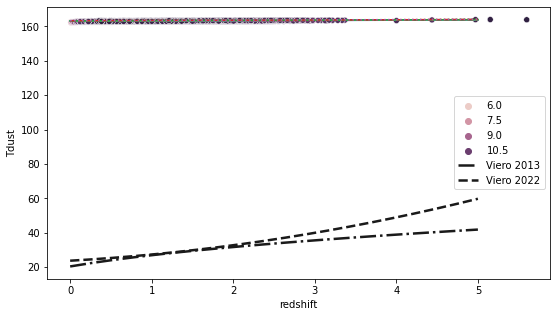

In [53]:
import seaborn as sns
fig, ax = plt.subplots(1,1, figsize=(9,5))
sns.set_color_codes(palette='pastel')
fig=sns.scatterplot(Zs_qt,Ts_qt, hue=Ms_qt)
#fig.set(ylim=(-38,-32))
fig.set(ylabel='Tdust')
fig.set(xlabel='redshift')
zs_model=np.linspace(0,5,20)
ms_list=[9.6,10,10.4,10.8,11.2]
as_list=[.1,.5,.9]
as_ls=['-','--',':']
for i, im in enumerate(ms_list):
    ms_model=np.zeros_like(zs_model)+im
    for j, ja in enumerate(as_list):
        as_model=np.zeros_like(zs_model)+ja
        T_mod_plot = model_A_or_Tdust(vT_qt_three, np.array([zs_model.tolist(),ms_model.tolist(),as_model.tolist()]))
        plt.plot(zs_model, T_mod_plot, as_ls[j])
        
plt.plot(zs_model, 27*((1+zs_model)/(1+1))**(0.4), '-.k', lw=2.5, label='Viero 2013');
Tv22 = 23.8 + 2.7 * zs_model + 0.9 * zs_model**2
plt.plot(zs_model, Tv22, '--k', lw=2.5, label='Viero 2022');
plt.legend();

In [4]:
simmap_dict = fluctfit_object.get_datacube()

In [5]:
cov_direct_fit_three3 = fluctfit_object.perform_fluctfit()

In [6]:
cov_direct_fit_three3.params

name,value,standard error,relative error,initial value,min,max,vary
A_offset_sf,-41.9992491,3614.44482,(8605.97%),-42,-inf,inf,True
T_offset_sf,23.0087510,34438.9470,(149677.60%),23,-inf,inf,True
A_offset_qt,-47.1492024,27930127.8,(59237752.47%),-50,-inf,inf,True
T_offset_qt,161.892928,1.2918e+09,(797925368.15%),130,-inf,inf,True
A_offset_agn,-40.9998467,704.701906,(1718.79%),-41,-inf,inf,True
T_offset_agn,18.0016622,6752.59266,(37510.94%),18,-inf,inf,True
A_slope_redshift_sf,0.20156017,1439.52869,(714193.04%),0.2,-inf,inf,True
T_slope_redshift_sf,0.21797115,16781.5855,(7698993.69%),0.2,-inf,inf,True
A_slope_redshift_qt,0.24463909,2819057.78,(1152333313.00%),0.2,-inf,inf,True
T_slope_redshift_qt,0.14887153,4040542.00,(2714113272.73%),0.2,-inf,inf,True


In [5]:
from lmfit import Parameters, minimize, fit_report

# Define Fit Parameters
fit_params_sfg = Parameters()
fit_params_sfg.add('A_offset_sf', value=fluctfit_object.init_dict['A']['sf']['offset'])
fit_params_sfg.add('T_offset_sf', value=fluctfit_object.init_dict['T']['sf']['offset'])
fit_params_sfg.add('A_offset_qt', value=fluctfit_object.init_dict['A']['qt']['offset'])
fit_params_sfg.add('T_offset_qt', value=fluctfit_object.init_dict['T']['qt']['offset'])
fit_params_sfg.add('A_offset_agn', value=fluctfit_object.init_dict['A']['agn']['offset'])
fit_params_sfg.add('T_offset_agn', value=fluctfit_object.init_dict['T']['agn']['offset'])

for key, val in fluctfit_object.config_dict['catalog']['classification'].items():

    if 'split_params' not in key:
        fit_params_sfg.add('A_slope_'+key+'_sf', value=fluctfit_object.init_dict['A']['sf']['slope_redshift'])
        fit_params_sfg.add('T_slope_'+key+'_sf', value=fluctfit_object.init_dict['A']['sf']['slope_redshift'])
        fit_params_sfg.add('A_slope_'+key+'_qt', value=fluctfit_object.init_dict['A']['sf']['slope_redshift'])
        fit_params_sfg.add('T_slope_'+key+'_qt', value=fluctfit_object.init_dict['A']['sf']['slope_redshift'])
        fit_params_sfg.add('A_slope_'+key+'_agn', value=fluctfit_object.init_dict['A']['sf']['slope_redshift'])
        fit_params_sfg.add('T_slope_'+key+'_agn', value=fluctfit_object.init_dict['A']['sf']['slope_redshift'])

if 1:
    cov_direct_fit_three2 = minimize(fluctfit_object.direct_convolved_fit_A_Tdust_three_pop, fit_params_sfg,
                         args=(fluctfit_object.datacube_dict['datacube'].to_numpy().T,),
                         kws={'y':simmap_dict},
                         nan_policy='propagate')

In [7]:
fluctfit_object.datacube_dict.keys()

dict_keys(['populations', 'catalog_keys', 'datacube', 'idx', 'simmap_dict'])

In [17]:
idx_sf=fluctfit_object.datacube_dict['idx']['sf']
idx_qt=fluctfit_object.datacube_dict['idx']['qt']
idx_agn=fluctfit_object.datacube_dict['idx']['agn']

In [19]:
Zs_sf

,z_peak,LMASS,F_ratio,sfg
1,0.01000,4.53,-1.948191,1.0
3,0.01000,4.69,-0.118435,1.0
4,0.01000,4.70,-0.161850,1.0
5,0.01000,4.81,-2.000000,1.0
6,0.02220,4.91,-1.920455,1.0
...,...,...,...,...
166518,3.11302,11.56,-0.239120,1.0
166565,1.42567,11.63,-1.041898,1.0
166569,2.13063,11.63,-0.666830,1.0
166577,0.92457,11.64,-0.337606,1.0


In [5]:
fluctfit_object.config_dict['catalog']['classification']

{'redshift': {'id': 'z_peak',
  'bins': '[0.01, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]'},
 'stellar_mass': {'id': 'LMASS', 'bins': '[9.0, 10.0, 10.5, 11.0, 12.0]'},
 'agn_fraction': {'id': 'F_ratio', 'bins': '[-2, -1, 1, 3]', 'log': 0.01},
 'split_params': {'id': 'sfg', 'bins': {'U-V': 'rf_U_V', 'V-J': 'rf_V_J'}}}

In [6]:
parameter_keys = list(fluctfit_object.config_dict['catalog']['classification'].keys())[:-1]

In [7]:
datacube_dict = {'catalog_keys': [fluctfit_object.config_dict['catalog']['classification'][i]['id'] for i in fluctfit_object.config_dict['catalog']['classification']]}

In [8]:
datacube_dict['datacube'] = fluctfit_object.catalog_dict['tables']['full_table'][datacube_dict['catalog_keys']]
if 'F_ratio' in datacube_dict['datacube']:
    fratio_min = 1e-2
    Fratio_cut = 1e-2
    datacube_dict['datacube']['F_ratio'] = np.log10(datacube_dict['datacube']['F_ratio']+fratio_min)
    datacube_dict['datacube']['sfg'][datacube_dict['datacube']['F_ratio'] >= Fratio_cut] = 2

In [9]:
idx_sf = (datacube_dict['datacube']['sfg'] == 1) #& (datacube_dict['datacube']['F_ratio'] < Fratio_cut)
idx_qt = (datacube_dict['datacube']['sfg'] == 0) #& (datacube_dict['datacube']['F_ratio'] < Fratio_cut)
idx_agn = (datacube_dict['datacube']['sfg'] == 2) #datacube_dict['datacube']['F_ratio'] >= Fratio_cut 

In [10]:
np.unique(datacube_dict['datacube']['sfg'])

array([0., 1., 2.])

In [11]:
datacube_dict['idx'] = {'sf': idx_sf, 'qt': idx_qt, 'agn': idx_agn}

In [12]:
map_dict_three_pop = {}
for map_key in fluctfit_object.maps_dict:
    map_object = fluctfit_object.maps_dict[map_key].copy()
    map_object['map_coords']={}
    for pop_key, pop_idx in datacube_dict['idx'].items():
        ra = fluctfit_object.catalog_dict['tables']['full_table'].loc[pop_idx]['ra']
        dec = fluctfit_object.catalog_dict['tables']['full_table'].loc[pop_idx]['dec']
        cms = map_object['map'].shape
        hd = map_object['header']
        wmap= WCS(hd)
        x, y = fluctfit_object.get_x_y_from_ra_dec(wmap, cms, pop_idx, ra, dec)
        map_object['map_coords'][pop_key] = [x,y]
    map_dict_three_pop[map_key]=map_object

In [14]:
from lmfit import Parameters, minimize, fit_report

# Define Fit Parameters
fit_params_sfg = Parameters()
fit_params_sfg.add('A_offset_sf', value=fluctfit_object.init_dict['A']['sf']['offset'])
fit_params_sfg.add('T_offset_sf', value=fluctfit_object.init_dict['T']['sf']['offset'])
fit_params_sfg.add('A_offset_qt', value=fluctfit_object.init_dict['A']['qt']['offset'])
fit_params_sfg.add('T_offset_qt', value=fluctfit_object.init_dict['T']['qt']['offset'])
fit_params_sfg.add('A_offset_agn', value=fluctfit_object.init_dict['A']['agn']['offset'])
fit_params_sfg.add('T_offset_agn', value=fluctfit_object.init_dict['T']['agn']['offset'])

for key, val in fluctfit_object.config_dict['catalog']['classification'].items():

    if 'split_params' not in key:
        fit_params_sfg.add('A_slope_'+key+'_sf', value=fluctfit_object.init_dict['A']['sf']['slope_redshift'])
        fit_params_sfg.add('T_slope_'+key+'_sf', value=fluctfit_object.init_dict['A']['sf']['slope_redshift'])
        fit_params_sfg.add('A_slope_'+key+'_qt', value=fluctfit_object.init_dict['A']['sf']['slope_redshift'])
        fit_params_sfg.add('T_slope_'+key+'_qt', value=fluctfit_object.init_dict['A']['sf']['slope_redshift'])
        fit_params_sfg.add('A_slope_'+key+'_agn', value=fluctfit_object.init_dict['A']['sf']['slope_redshift'])
        fit_params_sfg.add('T_slope_'+key+'_agn', value=fluctfit_object.init_dict['A']['sf']['slope_redshift'])

if 1:
    cov_direct_fit_three2 = minimize(fluctfit_object.direct_convolved_fit_A_Tdust_three_pop, fit_params_sfg,
                         args=(datacube_dict['datacube'].to_numpy().T,),
                         kws={'y':map_dict_three_pop},
                         nan_policy='propagate')

In [15]:
cov_direct_fit_three2.params

name,value,standard error,relative error,initial value,min,max,vary
A_offset_sf,-41.9992491,3614.44482,(8605.97%),-42,-inf,inf,True
T_offset_sf,23.0087510,34438.9470,(149677.60%),23,-inf,inf,True
A_offset_qt,-47.1492024,27930127.8,(59237752.47%),-50,-inf,inf,True
T_offset_qt,161.892928,1.2918e+09,(797925368.15%),130,-inf,inf,True
A_offset_agn,-40.9998467,704.701906,(1718.79%),-41,-inf,inf,True
T_offset_agn,18.0016622,6752.59266,(37510.94%),18,-inf,inf,True
A_slope_redshift_sf,0.20156017,1439.52869,(714193.04%),0.2,-inf,inf,True
T_slope_redshift_sf,0.21797115,16781.5855,(7698993.69%),0.2,-inf,inf,True
A_slope_redshift_qt,0.24463909,2819057.78,(1152333313.00%),0.2,-inf,inf,True
T_slope_redshift_qt,0.14887153,4040542.00,(2714113272.73%),0.2,-inf,inf,True


In [43]:
cov_direct_fit_three.params

name,value,standard error,relative error,initial value,min,max,vary
A_offset_sf,-41.9992491,3614.44482,(8605.97%),-42,-inf,inf,True
T_offset_sf,23.0087510,34438.9470,(149677.60%),23,-inf,inf,True
A_offset_qt,-47.1492024,27930127.8,(59237752.47%),-50,-inf,inf,True
T_offset_qt,161.892928,1.2918e+09,(797925368.15%),130,-inf,inf,True
A_offset_agn,-40.9998467,704.701906,(1718.79%),-41,-inf,inf,True
T_offset_agn,18.0016622,6752.59266,(37510.94%),18,-inf,inf,True
A_slope_redshift_sf,0.20156017,1439.52869,(714193.04%),0.2,-inf,inf,True
T_slope_redshift_sf,0.21797115,16781.5855,(7698993.69%),0.2,-inf,inf,True
A_slope_redshift_qt,0.24463909,2819057.78,(1152333313.00%),0.2,-inf,inf,True
T_slope_redshift_qt,0.14887153,4040542.00,(2714113272.73%),0.2,-inf,inf,True


In [13]:
print(np.sum(idx_sf))
print(np.sum(idx_qt))
print(np.sum(idx_agn))

61944
25307
79382


In [33]:
fit_params_sfg

name,value,initial value,min,max,vary
A_offset_sf,-42.0000000,-42,-inf,inf,True
T_offset_sf,23.0000000,23,-inf,inf,True
A_offset_qt,-50.0000000,-50,-inf,inf,True
T_offset_qt,130.000000,130,-inf,inf,True
A_offset_agn,-41.0000000,-41,-inf,inf,True
T_offset_agn,18.0000000,18,-inf,inf,True
A_slope_redshift_sf,0.20000000,0.2,-inf,inf,True
T_slope_redshift_sf,0.20000000,0.2,-inf,inf,True
A_slope_redshift_qt,0.20000000,0.2,-inf,inf,True
T_slope_redshift_qt,0.20000000,0.2,-inf,inf,True
